In [29]:
from sklearn import datasets
from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import re


%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import reuters
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import string

import keras
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import layers
from keras import Input
from keras.models import load_model

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fabian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fabian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Fabian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv("final_data.csv")
text=df['text'] 
pd.options.display.max_colwidth=500
df

,Symbol,text,Volatility
0,MMM,"About 3M Co3M Co is a technology company. The Company operates through four segments: Safety and Industrial, Transportation and Electronics, Health Care and Consumer. Safety and Industrial segment consist of abrasives, automotive aftermarket, closure and masking systems, communication markets, electrical markets, industrial adhesives and tapes, personal safety, roofing granules and other safety and industrial. Transportation and Electronics segment consists of advanced materials, automotive ...",0.013422
1,ABT,"About Abbott LaboratoriesAbbott Laboratories (Abbott) is engaged in the discovery, development, manufacture, and sale of a diversified line of health care products. The Company operates through four segments: Established Pharmaceutical Products, Diagnostic Products, Nutritional Products, and Medical Devices. The Company focuses on cardiovascular, diabetes care, diagnostics, neuromodulation, nutrition and medicine. It offers products, including FreeStyle, PediaSure, Pedialyte, Similac, EleCar...",0.015707
2,ABBV,"About AbbVie IncAbbVie Inc. (AbbVie) is a research-based biopharmaceutical company. The Company is engaged in research and development, manufacturing, commercialization and sale of medicines and therapies. AbbVie offers its products in various therapeutic categories, including Immunology products, which include Humira, Skyrizi and Rinvoq; Oncology products consists of Imbruvica and Venclexta; Aesthetics products include Botox Cosmetic, Juvederm Collection and other aesthetics; Neuroscience p...",0.014242
3,ABMD,"About ABIOMED, Inc.ABIOMED, Inc. is a provider of temporary percutaneous mechanical circulatory support devices. The Company offers care to heart failure patients. The Company operates in the segment of the research, development and sale of medical devices to assist or replace the pumping function of the failing heart. The Company develops, manufactures and markets products that are designed to enable the heart to rest, heal and recover by improving blood flow to the coronary arteries and en...",0.022429
4,ACN,"About Accenture PlcAccenture plc is a professional services company. It provides management and technology consulting services. Its segments include Communications, Media and Technology; Financial Services; Health and Public Service; Products, and Resources. The Communications, Media & Technology segment serves communications, electronics, technology, media and entertainment industries. The Financial Services segment serves banking, capital markets and insurance industries. The Health & Publ...",0.013775
...,...,...,...
495,YUM,"About Yum! Brands, Inc.YUM! Brands, Inc. is engaged in restaurant business. The Company operates or franchised over 50,000 restaurants in more than 150 countries and territories operating under the KFC, Pizza Hut or Taco Bell (collectively the Concepts) brands. The Company operates through three segments: The KFC Division, which includes the operations of the KFC concept around the world; The Pizza Hut Division, which includes the operations of the Pizza Hut concept around the world, and The...",0.012367
496,ZBRA,"About Zebra Technologies Corp.Zebra Technologies Corporation designs, manufactures and sells a range of automatic identification and data capture (AIDC) products. The Company's AIDC products include mobile computers, barcode scanners, radio frequency identification devices readers, specialty printers for barcode labeling and personal identification, real-time location systems, related accessories and supplies, such as self-adhesive labels and other consumables, and software utilities and app...",0.019611
497,ZBH,"About Zimmer Biomet Holdings IncZimmer Biomet Holdings, Inc. is engaged in designing, manufacturing and marketing of orthopedic reconstructive products; sports medicine, biologics, extremities and trauma products; office-based technologies; spine, craniomaxillofacial and thoracic products; dental implants, and related surgi

In [ ]:

# wordnet = nltk.WordNetLemmatizer()
# def my_preprocessor(text):
    
#     text=text.lower() 
#     text=re.sub("\\W"," ",text) # remove special chars
    
#     # lemmatize words
#     words=re.split("\\s+",text)
#     lemmatized_words=[wordnet.lemmatize(t) for t in words] 
#     return ' '.join(lemmatized_words)

# df['text prep'] = df['text'].apply(my_preprocessor)
# df



# in a first step I want to try my preprocessor --> it removes any special chars and lemmatizes the words

In [ ]:
count = CountVectorizer()
bag = count.fit_transform(df['text'])
bag  
#still need to try to clean the data a bit

<500x7269 sparse matrix of type '<class 'numpy.int64'>'
	with 37356 stored elements in Compressed Sparse Row format>

In [ ]:
# count.vocabulary_

In [ ]:
def my_preprocessor(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
    
    # lemmatize words
    words=re.split("\\s+",text)
    wordnet = nltk.WordNetLemmatizer()
    lemmatized_words=[wordnet.lemmatize(t) for t in words] 
    #stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(lemmatized_words)

count = CountVectorizer(stop_words='english',preprocessor=my_preprocessor)
bag = count.fit_transform(df['text'])
bag

##with preprocessor we got rid of almost 10k stored elements

c:\Users\Fabian\Desktop\Python\projects\Finance\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<500x6449 sparse matrix of type '<class 'numpy.int64'>'
	with 28345 stored elements in Compressed Sparse Row format>

In [ ]:
# count.vocabulary_

In [ ]:
X = df['text']
y = df['Volatility']

In [ ]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1, 2),preprocessor=my_preprocessor, max_features=10000)   #bigrams and unigrams
X_bag = tfidf.fit_transform(X)
X_bag.shape

(500, 10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bag, y, test_size=0.2,random_state=1)

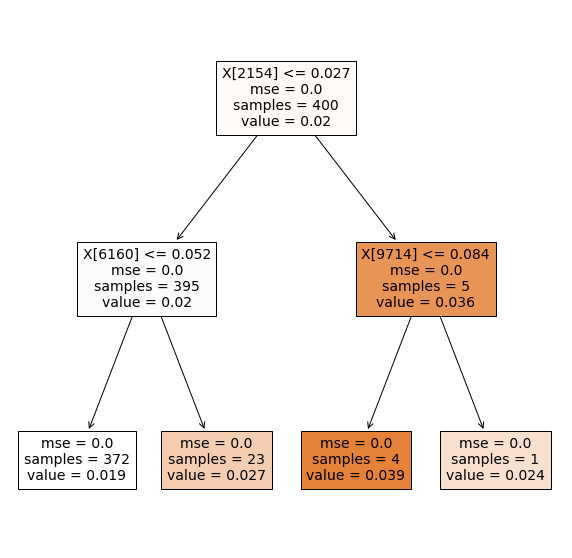

In [ ]:

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_reg, filled = True, ax=ax)
plt.show()



In [ ]:
X_train_keras = X_train.toarray()
X_train_keras.shape

(400, 10000)

In [24]:
callbacks_list = [
keras.callbacks.EarlyStopping(monitor='acc', patience=1,),
keras.callbacks.ModelCheckpoint(filepath='neural_network.h5', monitor='val_loss', save_best_only=True,)
]


text_input =  Input(shape= (X_train.shape[1],), dtype='float64')
x = layers.Flatten()(text_input)
x = layers.Dense(8, activation='relu')(x)
x = layers.Dense(4, activation='relu')(x)
x = layers.Dense(4, activation='relu')(x)
x = layers.Dense(4, activation='relu')(x)
output = layers.Dense(1)(x)

model = Model(text_input, output)
model.compile(optimizer='adam',
loss='mean_squared_error',
metrics=['mse'])


history = model.fit(X_train_keras, y_train, epochs=8, callbacks=callbacks_list, validation_split=0.1)

Epoch 1/8
12/12 [==============================] - 2s 50ms/step - loss: 3.3341e-04 - mse: 3.3341e-04 - val_loss: 8.0096e-05 - val_mse: 8.0096e-05
Epoch 2/8
12/12 [==============================] - 0s 15ms/step - loss: 4.0666e-05 - mse: 4.0666e-05 - val_loss: 6.7648e-05 - val_mse: 6.7648e-05
Epoch 3/8
12/12 [==============================] - 0s 17ms/step - loss: 5.3989e-05 - mse: 5.3989e-05 - val_loss: 6.0025e-05 - val_mse: 6.0025e-05
Epoch 4/8
12/12 [==============================] - 0s 13ms/step - loss: 4.0120e-05 - mse: 4.0120e-05 - val_loss: 6.4090e-05 - val_mse: 6.4090e-05
Epoch 5/8
12/12 [==============================] - 0s 16ms/step - loss: 3.9131e-05 - mse: 3.9131e-05 - val_loss: 5.6805e-05 - val_mse: 5.6805e-05
Epoch 6/8
12/12 [==============================] - 0s 15ms/step - loss: 3.8942e-05 - mse: 3.8942e-05 - val_loss: 5.5955e-05 - val_mse: 5.5955e-05
Epoch 7/8
12/12 [==============================] - 0s 9ms/step - loss: 3.0007e-05 - mse: 3.0007e-05 - val_loss: 5.4807e-05 -

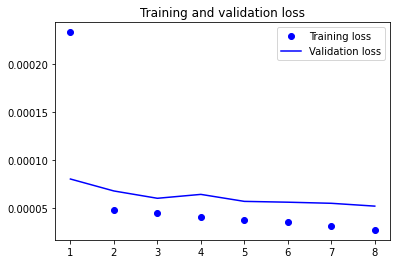

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:

 n_network = load_model('neural_network.h5')

NameError: name 'load_model' is not defined

In [27]:
test_loss, test_acc = n_network.evaluate(X_test.toarray(), y_test)
print(test_acc)

4/4 [==============================] - 0s 5ms/step - loss: 4.9529e-05 - mse: 4.9529e-05
4.95292988489382e-05
